<a href="https://colab.research.google.com/github/king-roman101/Blob-Stone-CPF2/blob/main/blob_detection3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blob detection

Blob detection is a computer vision technique used to identify and locate regions of an image that share common properties, such as color or intensity.

"BLOB" stands for Binary Large Object


## Import denpendencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

## Upload your image
1. Click folder icon on the left side of colab screen
2. Click upload icon then choose your image or drag your image to empty space in the lelf side

In [2]:
# Load input image
image = cv2.imread("Size3.5_1.jpg")
original_image = image.copy()

## Pre-processing image

In [3]:
# Convert image to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert pixel values to floating point for calculations
image_float = image.astype(float)

# Calculate mean and standard deviation
mean = np.mean(image_float)
std_dev = np.std(image_float)

# Perform standardization (z-score normalization)
standardized_image = (image_float - mean) / std_dev

# Scale pixel values back to [0, 255] range
standardized_image = np.clip(standardized_image * 127.5 + 127.5, 0, 255).astype(np.uint8)

# Define the kernel for erosion
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)

# Apply erosion
eroded_image = cv2.erode(image, kernel, iterations=1)

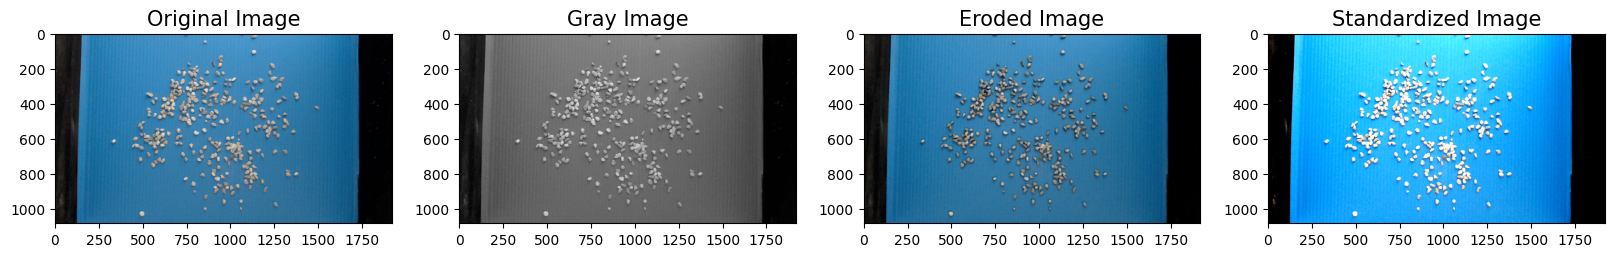

In [4]:
fig, ax = plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
ax[3].imshow(cv2.cvtColor(standardized_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image',fontsize=15)
ax[1].set_title('Gray Image',fontsize=15)
ax[2].set_title('Eroded Image',fontsize=15)
ax[3].set_title('Standardized Image',fontsize=15)
plt.show()

## Set up blob detection parameters
1. Area
2. Thresholds (Intensity)
3. Circularity
4. Inertia
5. Convexity (Area of the Blob / Area of it’s convex hull)
6. Distance Between Blobs

In [5]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Define color (dark or light blob)
params.filterByColor = True
params.blobColor = 255

# Define thresholds
params.minThreshold = 0
params.maxThreshold = 255

# Filter by Area.
params.filterByArea = True
params.minArea = 100
params.maxArea = 500

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.7
params.maxConvexity = 1

# Filter by InertiaRatio
params.filterByInertia = False
params.minInertiaRatio = 0.1
params.maxInertiaRatio = 1

# Distance Between Blobs
params.minDistBetweenBlobs = 0.00001

params.collectContours = True


# Setup the detector with parameters
detector = cv2.SimpleBlobDetector_create(params)

## Run Blob detection

In [20]:
# Detect blobs
keypoints = detector.detect(standardized_image)
print("Number of blobs detected are : ", len(keypoints))
print(keypoints)

Number of blobs detected are :  208
(< cv2.KeyPoint 0x79db504e6d00>, < cv2.KeyPoint 0x79db504e6ca0>, < cv2.KeyPoint 0x79db504e6f10>, < cv2.KeyPoint 0x79db6007da70>, < cv2.KeyPoint 0x79db5055aaf0>, < cv2.KeyPoint 0x79db5051acd0>, < cv2.KeyPoint 0x79db5051a820>, < cv2.KeyPoint 0x79db572b8e40>, < cv2.KeyPoint 0x79db504677e0>, < cv2.KeyPoint 0x79db50466c40>, < cv2.KeyPoint 0x79db50467db0>, < cv2.KeyPoint 0x79db50467900>, < cv2.KeyPoint 0x79db50467e10>, < cv2.KeyPoint 0x79db50465e30>, < cv2.KeyPoint 0x79db504678d0>, < cv2.KeyPoint 0x79db50467c30>, < cv2.KeyPoint 0x79db50465ef0>, < cv2.KeyPoint 0x79db50467f30>, < cv2.KeyPoint 0x79db50466910>, < cv2.KeyPoint 0x79db50467f90>, < cv2.KeyPoint 0x79db504654a0>, < cv2.KeyPoint 0x79db50467930>, < cv2.KeyPoint 0x79db50467cf0>, < cv2.KeyPoint 0x79db50467f00>, < cv2.KeyPoint 0x79db504677b0>, < cv2.KeyPoint 0x79db504664f0>, < cv2.KeyPoint 0x79db50467d80>, < cv2.KeyPoint 0x79db50467c60>, < cv2.KeyPoint 0x79db50464b10>, < cv2.KeyPoint 0x79db50467960>, < c

## Show image with blob result

In [13]:
def point_in_contour(point, contour):
    point = np.array(point)
    contour = np.array(contour)
    return cv2.pointPolygonTest(contour, tuple(point), False) >= 0


Area: [177.0, 173.5, 458.0, 346.5, 409.5, 448.0, 279.0, 156.0, 424.0, 325.5, 426.5, 414.0, 395.5, 371.5, 408.0, 259.5, 352.5, 340.5, 395.5, 190.0, 473.0, 304.0, 473.5, 438.0, 410.5, 328.5, 428.0, 450.5, 335.5, 497.5, 323.5, 349.0, 295.0, 407.0, 394.0, 308.0, 408.0, 432.5, 415.0, 398.5, 348.0, 453.5, 481.0, 178.0, 481.5, 398.5, 340.0, 420.0, 276.5, 311.5, 398.0, 474.0, 455.0, 354.0, 363.5, 291.0, 338.0, 372.5, 120.0, 361.0, 375.0, 407.5, 373.0, 387.0, 351.0, 409.5, 308.0, 313.5, 335.5, 371.5, 488.0, 385.5, 392.0, 434.5, 373.5, 371.0, 370.5, 368.0, 256.5, 349.5, 342.0, 455.5, 358.5, 419.5, 493.0, 268.5, 497.0, 499.5, 417.0, 446.5, 483.5, 449.0, 244.5, 150.0, 491.5, 409.5, 231.5, 457.5, 321.0, 174.0, 479.5, 352.0, 324.0, 305.0, 434.5, 281.0, 329.5, 172.5, 368.5, 233.5, 240.5, 240.5, 237.0, 405.5, 198.0, 461.5, 441.5, 494.5, 488.5, 402.0, 487.5, 492.5, 499.0, 457.5, 475.0, 457.5, 294.0, 407.5, 325.5, 180.5, 491.5, 498.0, 355.0, 313.5, 437.0, 174.0, 468.0, 432.5, 303.5, 358.0, 415.0, 351.5,

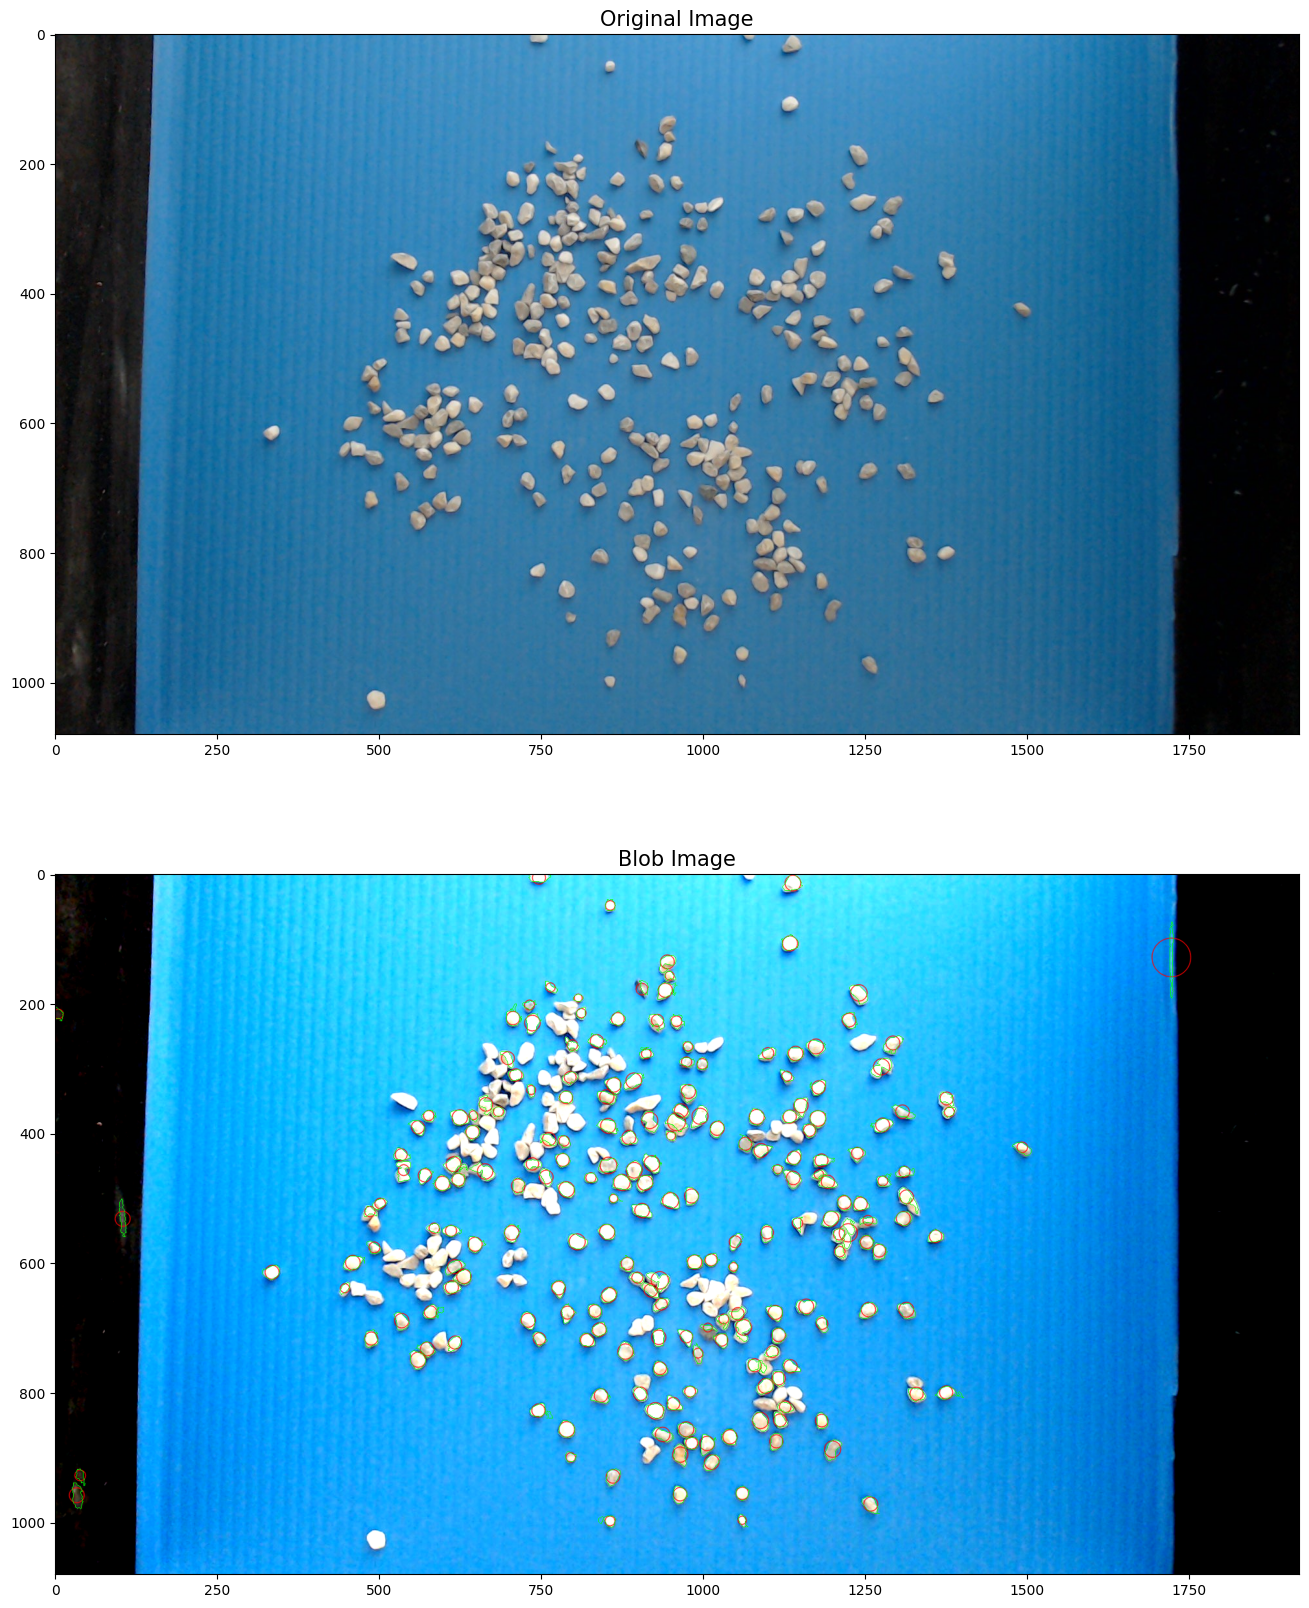

In [25]:
# Draw blobs
img_with_blobs = cv2.drawKeypoints(standardized_image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Get blob contour
contours = []
blob_areas = []
for contour in detector.getBlobContours():
    for keypoint in keypoints:
      if point_in_contour(keypoint.pt, contour):
        area = cv2.contourArea(contour)  # ดึงค่าพื้นที่ของ Blob
        blob_areas.append(area)  # เพิ่มค่าพื้นที่ในรายการ
        for x, y in contour:
            img_with_blobs = cv2.circle(img_with_blobs, (x,y), radius=0, color=(0, 255, 0), thickness=-1)
        contours.append(contour)
        break
print("Area:" ,blob_areas)

fig, ax = plt.subplots(2,1,figsize=(40,20))
ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_with_blobs, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image',fontsize=15)
ax[1].set_title('Blob Image',fontsize=15)
plt.show()